I didn't have trouble with the first exercise. For 10.5, it took a couple tries to get it. I did not include all of the required properties in my first try. It took me a couple tries to get the new list without inheriting for Salaried employees. I referenced 10.8 to update it I also ran out of time to thoroughly label my steps prior to my flight. 

9.16

In [1]:
import seaborn as sns

df = sns.load_dataset("diamonds")
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [10]:
csv_path = Path(r"C:\Users\secar\OneDrive\Documents\UCLA\IntroToPython-master\diamonds.csv")

First 7 rows:
          carat        cut color clarity  depth  table  price     x     y  \
rownames                                                                    
1          0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
2          0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84   
3          0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07   
4          0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23   
5          0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35   
6          0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96   
7          0.24  Very Good     I    VVS1   62.3   57.0    336  3.95  3.98   

             z  
rownames        
1         2.43  
2         2.31  
3         2.31  
4         2.63  
5         2.75  
6         2.48  
7         2.47   

Last 7 rows:
          carat        cut color clarity  depth  table  price     x     y  \
rownames                                       

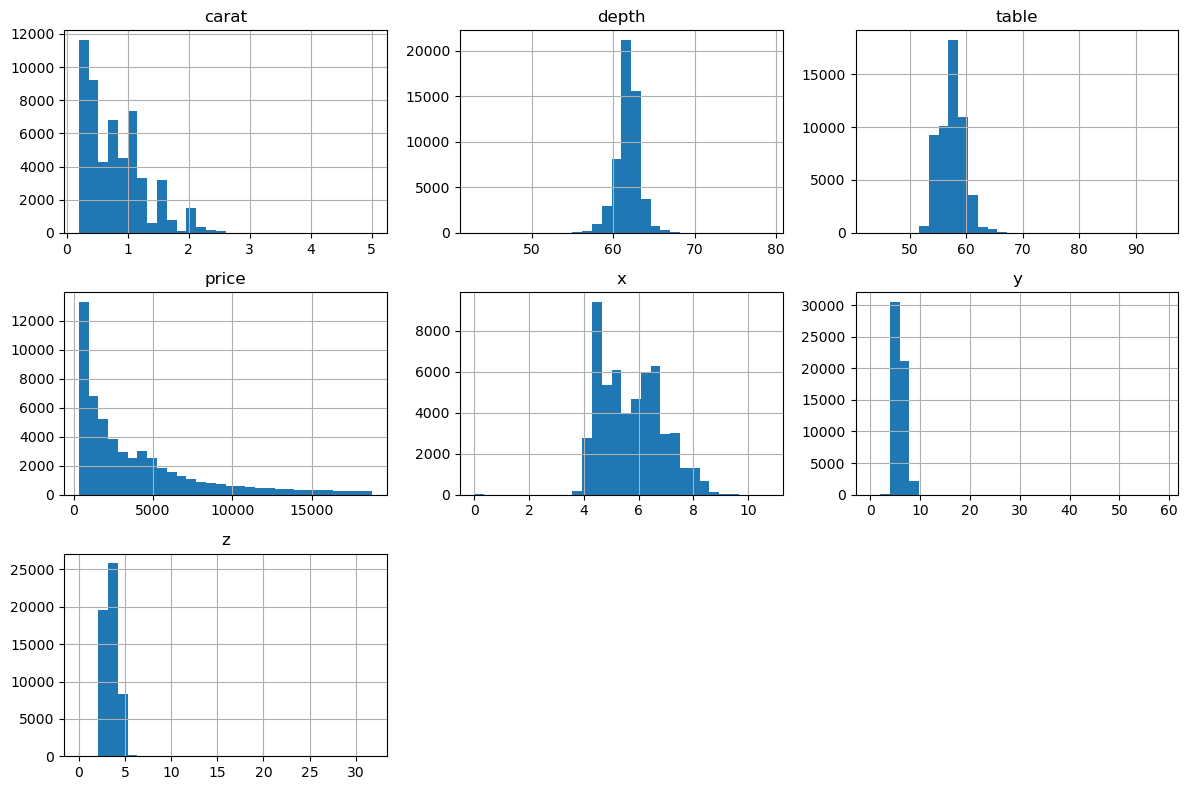

In [11]:
# 1) Load
df = pd.read_csv(csv_path, index_col=0)

# 2) Peek at the data
print("First 7 rows:")
print(df.head(7), "\n")

print("Last 7 rows:")
print(df.tail(7), "\n")

# 3) Descriptive stats (numeric only: carat, depth, table, price, x, y, z)
print("Numeric describe():")
print(df.describe(), "\n")

# 4) Categorical describe() for cut, color, clarity
for col in ["cut", "color", "clarity"]:
    print(f"{col} describe():")
    print(df[col].describe(), "\n")
    print(f"Unique values in {col}: {sorted(df[col].unique().tolist())}\n")

# 5) Histograms for the numeric columns (like in the text)
numeric_cols = ["carat", "depth", "table", "price", "x", "y", "z"]
df[numeric_cols].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()


10.2

In [ ]:
class Account:
    """Account class with read-only properties."""

    #1. Define the class and constructor
    def __init__(self, name, balance):
        self._name = name        # using leading underscore for "internal" attributes
        self._balance = balance

In [ ]:
#2. Create read-only properties
    @property
    def name(self):
        """Return account holder's name (read-only)."""
        return self._name

    @property
    def balance(self):
        """Return account balance (read-only)."""
        return self._balance

In [14]:
       
    #3. Use repr fpr debugging
    def __repr__(self):
        return f"Account(name='{self.name}', balance={self.balance})"

In [15]:
#Test the class
acct = Account("Alice", 1000)
print(acct.name)      # Alice
print(acct.balance)   # 1000

# Attempting reassignment:
acct.name = "Bob"       
acct.balance = 2000     

Alice
1000


AttributeError: property 'name' of 'Account' object has no setter

10.5 

In [ ]:
from decimal import Decimal

#1. check classes
class CommissionEmployee:
    """An employee who gets paid commission based on gross sales."""
    def __init__(self, first_name, last_name, ssn, gross_sales, commission_rate):
        """Initialize CommissionEmployee's attributes."""
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.gross_sales = gross_sales            # validate via property
        self.commission_rate = commission_rate    # validate via property

    @property
    def first_name(self): return self._first_name

    @property
    def last_name(self): return self._last_name

    @property
    def ssn(self): return self._ssn

In [ ]:
#2. Read-write with validation
    @property
    def gross_sales(self): return self._gross_sales

    @gross_sales.setter
    def gross_sales(self, sales):
        if sales < Decimal('0.00'):
            raise ValueError('Gross sales must be >= 0')
        self._gross_sales = sales

    @property
    def commission_rate(self): return self._commission_rate

    @commission_rate.setter
    def commission_rate(self, rate):
        if not (Decimal('0.0') < rate < Decimal('1.0')):
            raise ValueError('Interest rate must be greater than 0 and less than 1')
        self._commission_rate = rate

    def earnings(self):
        """Calculate earnings."""
        return self.gross_sales * self.commission_rate

    def __repr__(self):
        """Return string representation for repr()."""
        return ('CommissionEmployee: ' +
                f'{self.first_name} {self.last_name}\n' +
                f'social security number: {self.ssn}\n' +
                f'gross sales: {self.gross_sales:.2f}\n' +
                f'commission rate: {self.commission_rate:.2f}')

In [ ]:
# 3. Define salaried employees
class SalariedCommissionEmployee(CommissionEmployee):
    """Commission employee with a fixed base salary."""
    def __init__(self, first_name, last_name, ssn, gross_sales, commission_rate, base_salary):
        super().__init__(first_name, last_name, ssn, gross_sales, commission_rate)
        self.base_salary = base_salary  # validate via property

    @property
    def base_salary(self): return self._base_salary

    @base_salary.setter
    def base_salary(self, salary):
        if salary < Decimal('0.00'):
            raise ValueError('Base salary must be >= 0')
        self._base_salary = salary

    def earnings(self):
        return self.base_salary + super().earnings()

    def __repr__(self):
        return ('SalariedCommissionEmployee: ' +
                f'{self.first_name} {self.last_name}\n' +
                f'social security number: {self.ssn}\n' +
                f'gross sales: {self.gross_sales:.2f}\n' +
                f'commission rate: {self.commission_rate:.2f}\n' +
                f'base salary: {self.base_salary:.2f}')

In [ ]:
#4. Build the new list without inheriting
class SalariedEmployee:
    """Employee with fixed weekly salary."""
    def __init__(self, first_name, last_name, ssn, weekly_salary):
        self._first_name = first_name
        self._last_name = last_name
        self._ssn = ssn
        self.weekly_salary = weekly_salary  

    @property
    def first_name(self): return self._first_name

    @property
    def last_name(self): return self._last_name

    @property
    def ssn(self): return self._ssn

    @property
    def weekly_salary(self): return self._weekly_salary

    @weekly_salary.setter
    def weekly_salary(self, salary):
        if salary < Decimal('0.00'):
            raise ValueError('Weekly salary must be >= 0')
        self._weekly_salary = salary

    def earnings(self):
        """Required by 10.5 — same interface as others."""
        return self.weekly_salary

    def __repr__(self):
        """Required by 10.5 — readable string like other classes."""
        return ('SalariedEmployee: ' +
                f'{self.first_name} {self.last_name}\n' +
                f'social security number: {self.ssn}\n' +
                f'weekly salary: {self.weekly_salary:.2f}')

In [17]:

#5. Duck Typing
employees = [
    CommissionEmployee('Sue', 'Jones', '333-33-3333',
                       Decimal('10000.00'), Decimal('0.06')),
    SalariedCommissionEmployee('Bob', 'Lewis', '444-44-4444',
                               Decimal('5000.00'), Decimal('0.04'),
                               Decimal('900.00')),
    SalariedEmployee('Rae', 'Kim', '555-55-5555',
                     Decimal('1200.00'))
]

for emp in employees:
    print(emp)                  # __repr__
    print(f"Earnings: {emp.earnings():.2f}\n")

CommissionEmployee: Sue Jones
social security number: 333-33-3333
gross sales: 10000.00
commission rate: 0.06
Earnings: 600.00

SalariedCommissionEmployee: Bob Lewis
social security number: 444-44-4444
gross sales: 5000.00
commission rate: 0.04
base salary: 900.00
Earnings: 1100.00

SalariedEmployee: Rae Kim
social security number: 555-55-5555
weekly salary: 1200.00
Earnings: 1200.00

